/tmp/ipykernel_1140658/1803882380.py:36: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_still, hist=False, rug=True)
/tmp/ipykernel_1140658/1803882380.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_not_still, hist=False, rug=True)


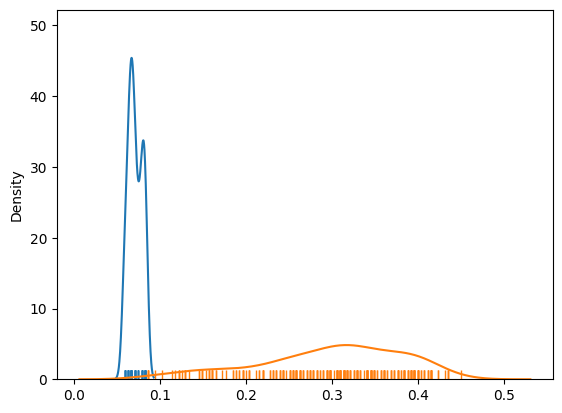

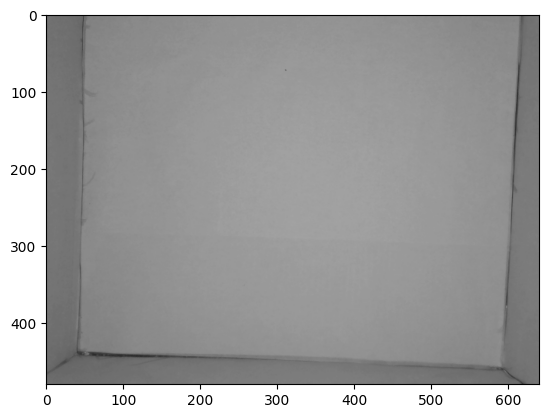

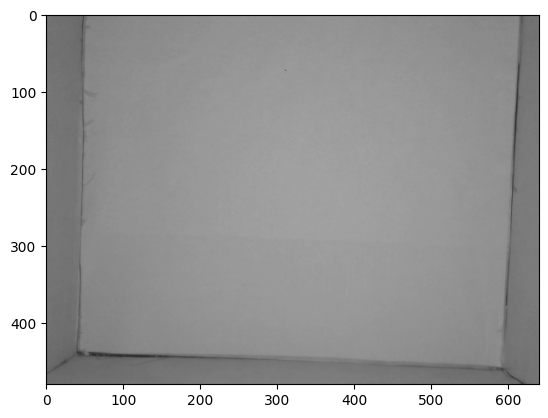

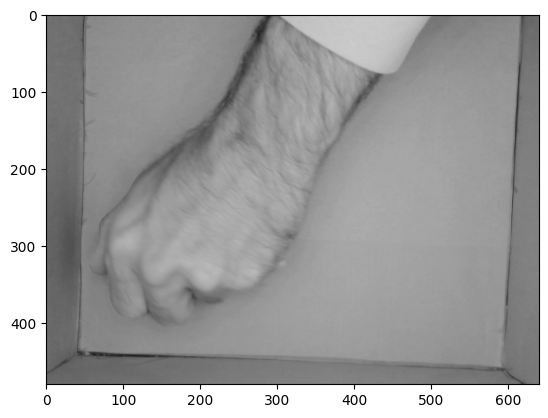

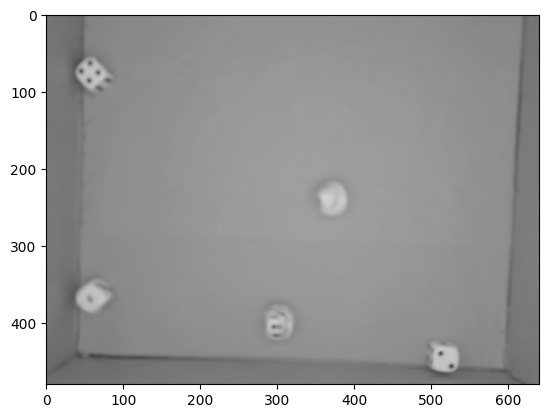

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

path = "/home/bule/projects/Dice/workspace/data/eyes2/empty"
images_still = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_still.append(img)
        
path = "/home/bule/projects/Dice/workspace/data/eyes2/empty"

images_not_still = []

path = "/home/bule/projects/Dice/workspace/data/eyes2/rolling"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_not_still.append(img)        
path = "/home/bule/projects/Dice/workspace/data/eyes2/still"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_not_still.append(img)             
        
gray_images_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_still]
gray_images_not_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_not_still]

med_still =[(np.max(im)-np.median(im))/255 for im in gray_images_still]
med_not_still =[(np.max(im)-np.median(im))/255 for im in gray_images_not_still]

# Scores for moving and empty images
import seaborn as sns
sns.distplot(med_still, hist=False, rug=True)
sns.distplot(med_not_still, hist=False, rug=True)
plt.show()
for img in gray_images_still[:2]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
for img in gray_images_not_still[:2]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

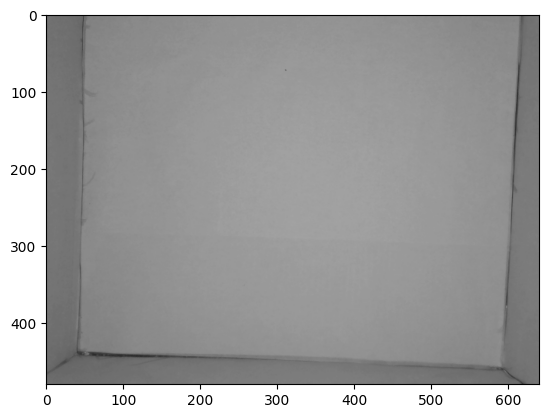

score 0.06274509803921569 difference 171324.23921568628
Current State: ('empty', False)


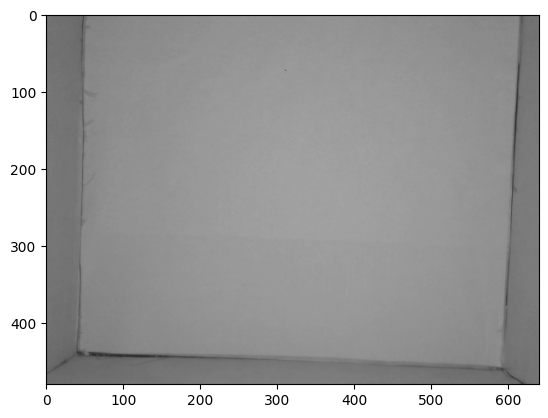

score 0.06666666666666667 difference 335.145098039211
Current State: ('empty', False)


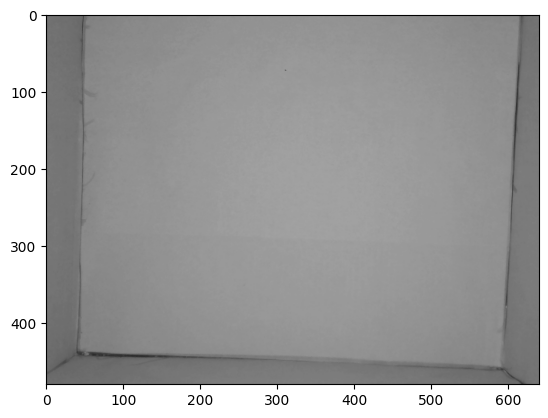

score 0.07058823529411765 difference 161.78039215685567
Current State: ('empty', False)


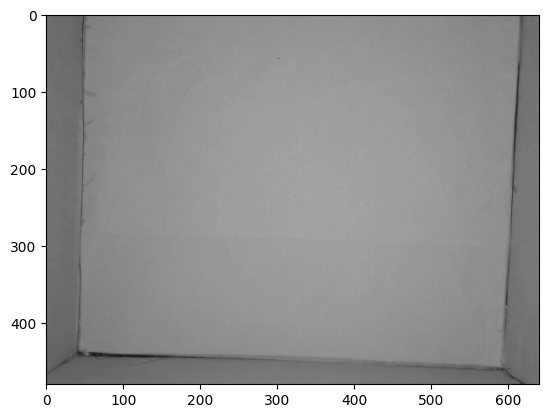

score 0.08235294117647059 difference 1732.1176470588252
Current State: ('empty', False)


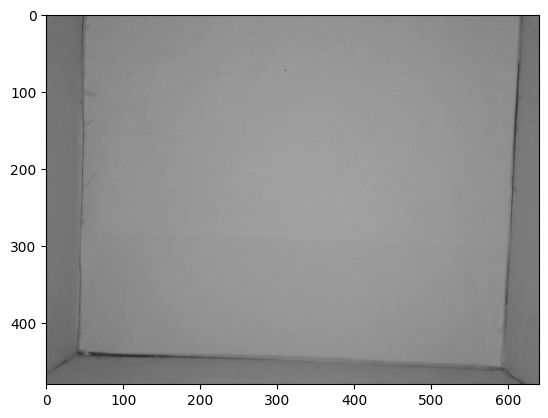

score 0.06666666666666667 difference 1560.701960784325
Current State: ('empty', False)


In [4]:
from collections import deque

class SceneStateDetector1:
    def __init__(self, threshold=0.1, moving_treshold =0.01, max_frames_stack=4):
        self.threshold = threshold
        self.moving_treshold = moving_treshold
        self.state_stack_lock = False
        self.queue =deque(maxlen=max_frames_stack)
        self.last_frame_sum = 0.0

    def get_scene_state(self,frame):
        
        self.capture=False
        # calculate score by subtracting background from the max pixel and scaling to 0-1 range
        score = (np.max(frame) - np.median(frame)) / 255.
        # set difference to previous frame
        difference = abs(np.sum(frame)/ 255. - self.last_frame_sum)
        
        self.last_frame_sum = np.sum(frame)/ 255.
        
        print("score",score,"difference",difference)
        state = "undecided"
        # deciding wether a frame is empty or moving
        if score < self.threshold:
            state = "empty"
        
        if difference > self.moving_treshold and score > self.threshold:
            state = "moving"
        
        #  push it to the stack FIFO
        self.queue.append(state)
        
        
        # reseting the statelock by having other states in the stack 
        if all(state != "still" for state in self.queue):
            self.state_stack_lock =False
            
        # if all the frames in the stack are still and the state is not locked we can capture the image , indicated by return capture = True
        if all(state == "still" for state in self.queue) and not self.state_stack_lock:
            self.state_stack_lock = True
            self.capture = True
            state = "empty"
            return state , self.capture
        
        
        # retrun the state and the indicator for capturing the image
        return state , self.capture


liste1=gray_images_still + gray_images_not_still


##TODO  test edge and corner cases and test with a video stream..

detector = SceneStateDetector1(threshold=0.1, moving_treshold =0.0001, max_frames_stack=4)
for frame in liste1[:5]:  # Replace with your actual camera stream loop
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    state = detector.get_scene_state(frame)
    
    print("Current State:", state)


In [9]:
from queue import Queue 
queue = Queue(4)

queue.put("S")
queue.put("E")
queue.put("E")
queue.put("R")

print(list(queue.queue))

queue.put("A")


 #print(list(queue.queue))

['S', 'E', 'E', 'R']


KeyboardInterrupt: 

In [17]:
from collections import deque

stack = deque(maxlen=4)

stack.append("S")
print(list(stack))
stack.append("E")
stack.append("E")
stack.append("R")

print(list(stack))

stack.append("A")

print(list(stack))


ImportError: cannot import name 'enque' from 'collections' (/home/bule/anaconda3/envs/dice/lib/python3.9/collections/__init__.py)